接下来我们做一个扩展，通常情况一件事情是否可以成功，不是只由一个因素决定，通常情况下有很多因素都可以决定，这里称为Feature。
也就是说我们需要训练一个多feature的二分类问题。

我们这里使用的例子为糖尿病预测。这个dataset有8个fearture，输出是1维的，即就是：是否患有糖尿病。

/opt/miniconda3/envs/PyTorch/lib/python3.12/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


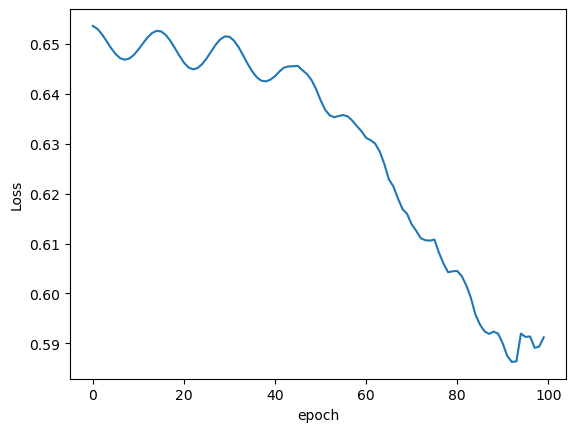

In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt

#data prepare
#skip the 1.row
xy = np.loadtxt('./dataset/diabetes.csv',delimiter=',',dtype=np.float32, skiprows = 1)
x_data = torch.from_numpy(xy[:,:-1])
y_data = torch.from_numpy(xy[:,[-1]])


#Define Model
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.linear1 = torch.nn.Linear(8,6)
        self.linear2 = torch.nn.Linear(6,4)
        self.linear3 = torch.nn.Linear(4,1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self,x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x
model = Model()


#construct Loss and Optimizer

criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(),lr = 0.1)

#training cycle

loss_value = []

for epoch in range(100):
    #Forward
    y_pred = model(x_data)
    loss = criterion(y_pred,y_data)
    loss_value.append(loss.item())
    #print(epoch,loss.item())

    #Backward
    optimizer.zero_grad
    loss.backward()

    #update
    optimizer.step()


#draw Loss-function
plt.plot(range(100), loss_value)
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()


我们可以看出使用Sigmoid作为激活函数并不是特别理想，Loss的收敛速度也不是很理想。接下来我们尝试使用ReLU作为激活函数对这个dataset进行训练，查看其结果

/opt/miniconda3/envs/PyTorch/lib/python3.12/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


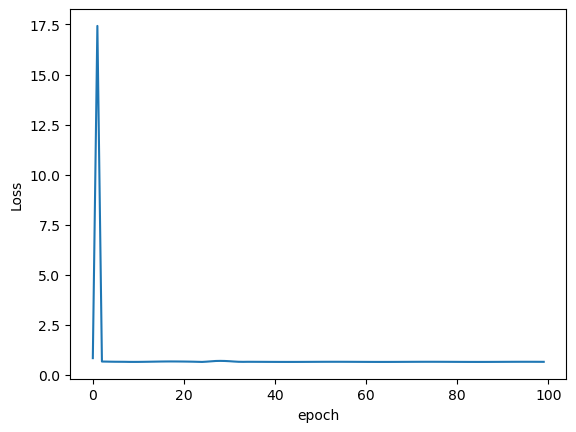

In [29]:
import torch
import numpy as np
import matplotlib.pyplot as plt

#data prepare
#skip the 1.row
xy = np.loadtxt('./dataset/diabetes.csv',delimiter=',',dtype=np.float32, skiprows = 1)
x_data = torch.from_numpy(xy[:,:-1])
y_data = torch.from_numpy(xy[:,[-1]])


#Define Model
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.linear1 = torch.nn.Linear(8,6)
        self.linear2 = torch.nn.Linear(6,4)
        self.linear3 = torch.nn.Linear(4,1)
        self.activate = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self,x):
        x = self.activate(self.linear1(x))
        x = self.activate(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x
model = Model()


#construct Loss and Optimizer

criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(),lr = 0.1)

#training cycle

loss_value = []

for epoch in range(100):
    #Forward
    y_pred = model(x_data)
    loss = criterion(y_pred,y_data)
    loss_value.append(loss.item())
    #print(epoch,loss.item())

    #Backward
    optimizer.zero_grad
    loss.backward()

    #update
    optimizer.step()


#draw Loss-function
plt.plot(range(100), loss_value)
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()


在上面的例子中，我们在导入数据和训练时，并没有引用Mini-Batch的方法。我们是将所有数据一起训练的，我们称之为full-batch Traning<br>
接下来我们来讨论这两种training的不同。<br>

全批量训练（Full-Batch Training）<br>

在全批量训练中，每次参数更新都使用整个训练集的数据。<br>

优点：<br>

	1.	准确的梯度估计：因为计算梯度时使用了所有的训练数据，所以梯度估计是准确的。
	2.	稳定的收敛：每次迭代都使用整个数据集，可以保证收敛的稳定性。

缺点：<br>

	1.	计算开销大：对大型数据集来说，每次迭代计算梯度和更新参数的时间开销很大。
	2.	内存需求高：需要在内存中存储整个数据集，对内存的需求很高。

小批量训练（Mini-Batch Training）<br>

在小批量训练中，每次参数更新使用训练集的一个子集（小批量）。<br>

优点：<br>

	1.	计算效率高：每次更新使用的数据量较小，计算速度更快，可以利用硬件加速（如 GPU。
	2.	更好的一般化性能：因为梯度估计有一定的随机性，这种噪声有助于模型跳出局部最优解。
	3.	内存需求低：只需要在内存中存储小批量的数据，内存需求较低。

缺点：

	1.	梯度估计不准确：每次更新使用的不是整个数据集，所以梯度估计会有一定的噪声。
	2.	可能的震荡：由于梯度估计的随机性，训练过程中损失函数可能会有震荡。

Epoch1/100,Loss:0.6935024658838908
Epoch2/100,Loss:0.6846085811654726
Epoch3/100,Loss:0.6774744217594465
Epoch4/100,Loss:0.6717412720123926
Epoch5/100,Loss:0.6670062417785326
Epoch6/100,Loss:0.6632008378704389
Epoch7/100,Loss:0.6600905259450277
Epoch8/100,Loss:0.6575983936587969
Epoch9/100,Loss:0.6555565843979517
Epoch10/100,Loss:0.6538679227232933
Epoch11/100,Loss:0.6525366256634394
Epoch12/100,Loss:0.6514354149500529
Epoch13/100,Loss:0.650528202454249
Epoch14/100,Loss:0.6497626379132271
Epoch15/100,Loss:0.649168444176515
Epoch16/100,Loss:0.6486956725517908
Epoch17/100,Loss:0.6482940142353376
Epoch18/100,Loss:0.6479322587450346
Epoch19/100,Loss:0.6476829846700033
Epoch20/100,Loss:0.6474428648749987
Epoch21/100,Loss:0.6472687969605128
Epoch22/100,Loss:0.6471085002024969
Epoch23/100,Loss:0.6469829405347506
Epoch24/100,Loss:0.6468618785341581
Epoch25/100,Loss:0.6467792342106501
Epoch26/100,Loss:0.646680161356926
Epoch27/100,Loss:0.6466197669506073
Epoch28/100,Loss:0.6465996876358986
Epoc

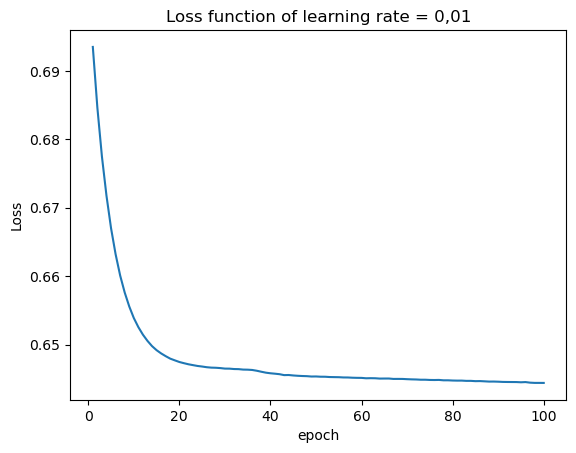

In [39]:
import torch
import numpy as np
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt



#dataset prepare
class DiabetesDataset(Dataset):
    def __init__(self, filepath):
        xy = np.loadtxt(filepath,delimiter = ',', dtype=np.float32, skiprows=1)
        self.len = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:,:-1])
        self.y_data = torch.from_numpy(xy[:,[-1]])

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
    
    def __len__(self):
        return self.len
    
dataset = DiabetesDataset('./dataset/diabetes.csv')
train_loader = DataLoader(dataset = dataset,
                          batch_size= 32,
                          shuffle = True,
                          num_workers=0)


#difine model

class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.linear1 = torch.nn.Linear(8,6)
        self.linear2 = torch.nn.Linear(6,4)
        self.linear3 = torch.nn.Linear(4,1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self,x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x
    
model = Model()

#construct Loss function and optimizer
#reduction 参数可以取以下三个值：

#	1.	none：不进行任何减少操作。损失值将保持与输入形状相同。
#	2.	mean：计算所有样本损失的平均值。默认值为 mean。
#	3.	sum：计算所有样本损失的总和。
criterion = torch.nn.BCELoss(reduction= 'mean')
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

#training cycle
loss_value = []

for epoch in range(100):
    epoch_loss = 0
    for i, data in enumerate(train_loader, 0):
        #prepare data
        inputs,labels = data
        #forward
        y_pred = model(inputs)
        loss = criterion(y_pred,labels)
        epoch_loss += loss.item()
        #backward
        optimizer.zero_grad()
        loss.backward()
        #update
        optimizer.step()
    average_epoch_loss = epoch_loss/len(train_loader)
    loss_value.append(average_epoch_loss)
    print(f'Epoch{epoch+1}/100,Loss:{average_epoch_loss}')

plt.plot(range(1,101), loss_value)
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss function of learning rate = 0,01')
plt.show()






